# Descriptive statistics of the data

This notebook aims to gain more insight into the descriptive statistics of the input and output variables used in our models. We investigate missing percentages, summary statistics and correlations.

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the data
possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/Thesis_Sofia_Lennert/new_data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/Thesis_Sofia_Lennert/new_data'
]
file = 'merged_data.csv'
path = next((f'{path}/{file}' for path in possible_paths if os.path.exists(f'{path}/{file}')), None)

# Display all columns
pd.set_option('display.max_columns', None) 
data = pd.read_csv(path)
#data.head()

In [4]:
# Input variables
input_columns = ['AGE', 'SEX', 'RACE', 'CONTINENT', 'MHDIAGN', 'CARDIO', 'URINARY', 'MUSCKELET', 'FATIGUE',
                  'NHPT-before', 'PASAT_2s-before', 'PASAT_3s-before', 'SDMT-before', 'T25FW-before', 'T-before', 'P-before', 
                  'N-before', 'SLEC_before', 'SES_before', 'BDI-before', 'EDSS-before', 'KFSS_M-before', 'KFSS_P-before', 
                  'M_R36-SF12-before', 'P_R36-SF12-before', 'R36-SF12-before_Ind'] #'CECONTRT', 'MHCONTRT'

# Possible target variables
output_columns = ['CESEV', 'TOTRELAP', 'SMSTDY', 'NRELAP', 'NHPT-2y', 'NHPT-after_2y', 'PASAT_2s-2y', 'PASAT_2s-after_2y', 
                  'PASAT_3s-2y', 'PASAT_3s-after_2y', 'SDMT-2y', 'T25FW-2y', 'T25FW-after_2y', 'T-after', 'P-after', 'N-after',
                  'SLEC_after', 'SES_after', 'BDI-after', 'EDSS-2y', 'EDSS-after_2y', 'KFSS_M-2y', 'KFSS_M-after_2y', 
                  'KFSS_P-2y', 'KFSS_P-after_2y', 'M_R36-SF12-after', 'P_R36-SF12-after', 'R36-SF12-after_Ind']

# Used target variables
target_columns = ['KFSS_M-2y', 'KFSS_P-2y', 'EDSS-2y', 'T25FW-2y', 'NHPT-2y', 'P_R36-SF12-after', 'M_R36-SF12-after', 
             'SES_after', 'SLEC_after', 'KFSS_M-after_2y', 'KFSS_P-after_2y', 'EDSS-after_2y', 'NRELAP', 'CESEV']


# Remainign columns
remaining_columns = [col for col in data.columns if col not in input_columns and col not in target_columns]

inputs = data[input_columns]
outputs = data[output_columns]
targets=data[target_columns]
remaining = data[remaining_columns]

In [45]:
len(input_columns)+len(target_columns)+len(remaining_columns)

78

Check rows that have missing inputs when there are no missing outputs (result: the 144 complete cases) - HOWEVER, from 1.4 onwards, scikit-learn can handle missing values.

In [6]:
outcomes= ['KFSS_M-2y', 'KFSS_P-2y', 'EDSS-2y', 'T25FW-2y', 'NHPT-2y', 'P_R36-SF12-after', 'M_R36-SF12-after', 'SES_after', 
           'SLEC_after', 'KFSS_M-after_2y', 'KFSS_P-after_2y', 'EDSS-after_2y', 'NRELAP', 'CESEV']
outcomes = data[outcomes]
inputs

# Find indices of rows with missing values in outcomes
missing_outcomes_indices = outcomes[outcomes.isnull().any(axis=1)].index

# Find indices of rows with missing values in inputs
missing_inputs_indices = inputs[inputs.isnull().any(axis=1)].index

# Find non-overlapping indices
non_overlapping_indices = missing_outcomes_indices.symmetric_difference(missing_inputs_indices)

# Extract non-overlapping rows
non_overlapping_outcomes = outcomes.loc[non_overlapping_indices]
non_overlapping_inputs = inputs.loc[non_overlapping_indices]

print("Non-overlapping rows where inputs have missing values but outcomes do not:")
print(non_overlapping_inputs)


Non-overlapping rows where inputs have missing values but outcomes do not:
       AGE SEX   RACE      CONTINENT MHDIAGN  CARDIO  URINARY  MUSCKELET  \
5     35.0   F  WHITE         EUROPE    RRMS       0        1          1   
11    28.0   F  WHITE         EUROPE    RRMS       0        1          0   
29    29.0   F  WHITE         EUROPE    RRMS       0        0          0   
57    37.0   F  WHITE         EUROPE    RRMS       0        1          0   
69    37.0   M  WHITE  NORTH AMERICA    RRMS       0        0          1   
...    ...  ..    ...            ...     ...     ...      ...        ...   
2423  48.0   F  WHITE         EUROPE    RRMS       0        1          0   
2432  41.0   F  WHITE  NORTH AMERICA    RRMS       1        1          1   
2437  42.0   M  WHITE         EUROPE    RRMS       0        0          1   
2447  28.0   M  WHITE        EURASIA    RRMS       0        0          0   
2451  35.0   M  WHITE         EUROPE    RRMS       0        0          1   

      FATIGU

### Inputs

In [7]:
inputs.dtypes

AGE                    float64
SEX                     object
RACE                    object
CONTINENT               object
MHDIAGN                 object
CARDIO                   int64
URINARY                  int64
MUSCKELET                int64
FATIGUE                  int64
NHPT-before            float64
PASAT_2s-before        float64
PASAT_3s-before        float64
SDMT-before            float64
T25FW-before           float64
T-before               float64
P-before               float64
N-before               float64
SLEC_before            float64
SES_before             float64
BDI-before             float64
EDSS-before            float64
KFSS_M-before          float64
KFSS_P-before          float64
M_R36-SF12-before      float64
P_R36-SF12-before      float64
R36-SF12-before_Ind    float64
dtype: object

Missingness

In [8]:
# Compute the percentage of missing values for each column
missing_percentage = (inputs.isnull().sum() / len(inputs)) * 100

# Round the percentage to 2 decimal places
missing_percentage = missing_percentage.round(2)

# Create a dataframe to store the results
missing_inputs = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})

# Sort the dataframe by missing percentage in descending order
missing_inputs = missing_inputs.sort_values(by='Missing Percentage', ascending=False)
missing_inputs

,Column,Missing Percentage
12,SDMT-before,79.76
19,BDI-before,72.58
10,PASAT_2s-before,68.60
17,SLEC_before,67.95
18,SES_before,67.91
16,N-before,58.54
3,CONTINENT,56.27
22,KFSS_P-before,46.57
21,KFSS_M-before,46.57
15,P-before,46.09


Summary statistics (numerical columns)

In [9]:
# Calculate descriptive statistics for numeric columns
numeric_stats_inputs = round(inputs.describe(), 2)

# Add missing values percentage
missing_percentage_inputs = inputs.isnull().mean() * 100
numeric_stats_inputs.loc['Missing %'] = round(missing_percentage, 2)

# Transpose the dataframe
numeric_stats = numeric_stats_inputs.T
numeric_stats.sort_values(by='Missing %', ascending=False)
numeric_stats

,count,mean,std,min,25%,50%,75%,max,Missing %
AGE,2382.0,41.77,10.41,18.00,34.00,42.00,50.00,72.00,3.37
CARDIO,2465.0,0.23,0.42,0.00,0.00,0.00,0.00,1.00,0.00
URINARY,2465.0,0.45,0.50,0.00,0.00,0.00,1.00,1.00,0.00
MUSCKELET,2465.0,0.32,0.47,0.00,0.00,0.00,1.00,1.00,0.00
FATIGUE,2465.0,0.34,0.48,0.00,0.00,0.00,1.00,1.00,0.00
NHPT-before,1622.0,26.89,14.90,11.60,20.10,23.78,29.05,300.00,34.20
PASAT_2s-before,774.0,34.83,11.81,3.50,25.50,34.50,43.50,59.50,68.60
PASAT_3s-before,1621.0,45.60,11.88,1.50,38.00,49.00,55.50,60.00,34.24
SDMT-before,499.0,47.29,15.87,0.00,37.00,47.50,57.00,110.00,79.76
T25FW-before,1690.0,10.48,11.63,2.40,5.15,6.85,10.99,133.80,31.44


Summary statistics (categorical columns)

In [10]:
# Filter categorical columns
categorical_columns = ['SEX', 'RACE', 'CONTINENT', 'MHDIAGN', 'CARDIO', 'URINARY', 'MUSCKELET', 'FATIGUE','R36-SF12-before_Ind','T-before','P-before','N-before']

# Initialize an empty list to store the results
categorical_stats = []

# Loop through each categorical column
for column in categorical_columns:
    # Count non-missing values
    non_missing_count = inputs[column].count()
    
    # Calculate percentage of missing values
    missing_percentage = (1 - non_missing_count / len(inputs)) * 100
    
    # Calculate mode (most frequent value)
    mode_value = inputs[column].mode().iloc[0]
    
    # Append the statistics to the list
    categorical_stats.append({
        'Column': column,
        'Count': non_missing_count,
        '% Missing': missing_percentage,
        'Mode': mode_value
    })

# Create a DataFrame from the list of dictionaries
categorical_stats_df = pd.DataFrame(categorical_stats)
categorical_stats_df

,Column,Count,% Missing,Mode
0,SEX,2465,0.000000,F
1,RACE,1691,31.399594,WHITE
2,CONTINENT,1078,56.267748,EUROPE
3,MHDIAGN,2463,0.081136,RRMS
4,CARDIO,2465,0.000000,0
5,URINARY,2465,0.000000,0
6,MUSCKELET,2465,0.000000,0
7,FATIGUE,2465,0.000000,0
8,R36-SF12-before_Ind,1550,37.119675,1.0
9,T-before,1379,44.056795,0.0


In [11]:
inputs[categorical_columns] = inputs[categorical_columns].astype('object')

C:\Users\anaso\AppData\Local\Temp\ipykernel_40520\2363175958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs[categorical_columns] = inputs[categorical_columns].astype('object')


In [12]:
dfs_per_column = {}

# Loop through each categorical column
for column in categorical_columns:
    # Create a DataFrame for the current column with unique values as rows
    unique_values_df = pd.DataFrame(inputs[column].value_counts(normalize=True)).reset_index()
    unique_values_df.columns = [column, 'Frequency Percentage']
    
    # Calculate count for each unique value
    count_df = inputs[column].value_counts().reset_index()
    count_df.columns = [column, 'Count']
    
    # Merge count_df with unique_values_df
    unique_values_df = pd.merge(unique_values_df, count_df, on=column)
    
    # Round the frequency percentage to one decimal place and multiply by 100
    unique_values_df['Frequency Percentage'] = (unique_values_df['Frequency Percentage'] * 100).round(2)
    
    # Add the DataFrame to the dictionary
    dfs_per_column[column] = unique_values_df


In [13]:
dfs_per_column['SEX']

,SEX,Frequency Percentage,Count
0,F,67.26,1658
1,M,32.74,807


In [14]:
dfs_per_column['RACE']

,RACE,Frequency Percentage,Count
0,WHITE,90.72,1534
1,NON-WHITE,9.28,157


In [15]:
dfs_per_column['CONTINENT']

,CONTINENT,Frequency Percentage,Count
0,EUROPE,55.19,595
1,NORTH AMERICA,30.71,331
2,ASIA,6.40,69
3,EURASIA,4.92,53
4,OCEANIA,1.58,17
5,SOUTH AMERICA,1.21,13


In [16]:
dfs_per_column['MHDIAGN']

,MHDIAGN,Frequency Percentage,Count
0,RRMS,64.15,1580
1,SPMS,22.45,553
2,PPMS,13.40,330


In [17]:
dfs_per_column['CARDIO']

,CARDIO,Frequency Percentage,Count
0,0,76.55,1887
1,1,23.45,578


In [18]:
dfs_per_column['URINARY']

,URINARY,Frequency Percentage,Count
0,0,55.29,1363
1,1,44.71,1102


In [19]:
dfs_per_column['MUSCKELET']

,MUSCKELET,Frequency Percentage,Count
0,0,67.59,1666
1,1,32.41,799


In [20]:
dfs_per_column['FATIGUE']

,FATIGUE,Frequency Percentage,Count
0,0,65.64,1618
1,1,34.36,847


In [21]:
dfs_per_column['R36-SF12-before_Ind']

,R36-SF12-before_Ind,Frequency Percentage,Count
0,1.0,67.87,1052
1,0.0,32.13,498


In [22]:
dfs_per_column['T-before']

,T-before,Frequency Percentage,Count
0,0.0,98.48,1358
1,1.0,1.52,21


In [23]:
dfs_per_column['P-before']

,P-before,Frequency Percentage,Count
0,0.0,98.27,1306
1,1.0,1.73,23


In [24]:
dfs_per_column['N-before']

,N-before,Frequency Percentage,Count
0,0.0,97.65,998
1,1.0,2.35,24


### Targets

Missingness

In [25]:
# Compute the percentage of missing values for each column
missing_percentage = (targets.isnull().sum() / len(inputs)) * 100

# Round the percentage to 2 decimal places
missing_percentage = missing_percentage.round(2)

# Create a dataframe to store the results
missing_outputs = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})

# Sort the dataframe by missing percentage in descending order
missing_outputs = missing_outputs.sort_values(by='Missing Percentage', ascending=False)
missing_outputs

,Column,Missing Percentage
9,KFSS_M-after_2y,78.50
10,KFSS_P-after_2y,78.50
11,EDSS-after_2y,73.75
7,SES_after,68.19
8,SLEC_after,68.19
13,CESEV,61.87
0,KFSS_M-2y,46.86
1,KFSS_P-2y,46.86
5,P_R36-SF12-after,37.97
6,M_R36-SF12-after,37.97


Summary statistics (numerical columns)

In [26]:
# Calculate descriptive statistics for numeric columns
numeric_stats = round(targets.describe(), 2)

# Add missing values percentage
missing_percentage = targets.isnull().mean() * 100
numeric_stats.loc['Missing %'] = round(missing_percentage, 2)

numeric_stats = numeric_stats.T
numeric_stats.sort_values(by='Missing %', ascending=False)
numeric_stats

,count,mean,std,min,25%,50%,75%,max,Missing %
KFSS_M-2y,1310.0,0.23,0.13,0.00,0.11,0.22,0.33,0.76,46.86
KFSS_P-2y,1310.0,0.15,0.13,0.00,0.04,0.12,0.25,0.75,46.86
EDSS-2y,1614.0,3.98,1.92,0.00,2.25,4.00,6.00,8.00,34.52
T25FW-2y,1668.0,12.08,15.74,2.80,5.30,7.25,11.96,180.00,32.33
NHPT-2y,1610.0,27.11,15.19,10.90,19.90,23.30,29.34,300.00,34.69
P_R36-SF12-after,1529.0,0.65,0.16,0.25,0.54,0.63,0.77,1.00,37.97
M_R36-SF12-after,1529.0,0.70,0.15,0.00,0.59,0.70,0.81,1.00,37.97
SES_after,784.0,1.05,0.27,0.10,1.00,1.25,1.25,1.25,68.19
SLEC_after,784.0,21.85,12.58,0.00,12.00,23.00,32.00,52.00,68.19
KFSS_M-after_2y,530.0,0.24,0.14,0.00,0.11,0.24,0.33,0.59,78.50


Summary statistics (categorical columns)

In [27]:
# Filter categorical columns
categorical_columns = ['CESEV', 'NRELAP']

# Initialize an empty list to store the results
categorical_stats = []

# Loop through each categorical column
for column in categorical_columns:
    # Count non-missing values
    non_missing_count = targets[column].count()
    
    # Calculate percentage of missing values
    missing_percentage = (1 - non_missing_count / len(targets)) * 100
    
    # Calculate mode (most frequent value)
    mode_value = targets[column].mode().iloc[0]
    
    # Append the statistics to the list
    categorical_stats.append({
        'Column': column,
        'Count': non_missing_count,
        '% Missing': missing_percentage,
        'Mode': mode_value
    })

# Create a DataFrame from the list of dictionaries
categorical_stats_df = pd.DataFrame(categorical_stats)
categorical_stats_df

,Column,Count,% Missing,Mode
0,CESEV,940,61.866126,MODERATE
1,NRELAP,2465,0.000000,0.0


In [28]:
# Initialize dictionary to store DataFrames per column
dfs_per_column = {}

# Loop through each categorical column
for column in categorical_columns:
    # Create a DataFrame for the current column with unique values as rows
    unique_values_df = pd.DataFrame(targets[column].value_counts(normalize=True)).reset_index()
    unique_values_df.columns = [column, 'Frequency Percentage']
    
    # Round the frequency percentage to one decimal place and multiply by 100
    unique_values_df['Frequency Percentage'] = (unique_values_df['Frequency Percentage'] * 100).round(2)

    # Calculate count for each unique value
    count_df = targets[column].value_counts().reset_index()
    count_df.columns = [column, 'Count']
    
    # Merge count_df with unique_values_df
    unique_values_df = pd.merge(unique_values_df, count_df, on=column)
    
    # Add the DataFrame to the dictionary
    dfs_per_column[column] = unique_values_df

In [29]:
dfs_per_column['CESEV']

,CESEV,Frequency Percentage,Count
0,MODERATE,56.81,534
1,MILD,25.32,238
2,SEVERE,17.87,168


In [30]:
dfs_per_column['NRELAP']

,NRELAP,Frequency Percentage,Count
0,0.0,65.40,1612
1,1.0,19.68,485
2,2.0,8.56,211
3,3.0,3.33,82
4,4.0,1.58,39
5,5.0,0.89,22
6,6.0,0.45,11
7,7.0,0.08,2
8,9.0,0.04,1


### Remaining Variables

In [31]:
remaining.dtypes

USUBJID                       object
CECONTRT                      object
TOTRELAP                     float64
MHCONTRT                      object
SMSTDY                       float64
NHPT-after_2y                float64
PASAT_2s-2y                  float64
PASAT_2s-after_2y            float64
PASAT_3s-2y                  float64
PASAT_3s-after_2y            float64
SDMT-2y                      float64
T25FW-after_2y               float64
T-after                      float64
P-after                      float64
N-after                      float64
BDI-after                    float64
KFSS1-Sensory-2y             float64
KFSS1-Sensory-after_2y       float64
KFSS1-Sensory-before         float64
KFSS1-Brain-2y               float64
KFSS1-Brain-after_2y         float64
KFSS1-Brain-before           float64
KFSS1-Bowel-2y               float64
KFSS1-Bowel-after_2y         float64
KFSS1-Bowel-before           float64
KFSS1-Pyramidal-2y           float64
KFSS1-Pyramidal-after_2y     float64
K

Summary statistics (numerical columns)

In [32]:
# Compute the percentage of missing values for each column
missing_percentage = (remaining.isnull().sum() / len(remaining)) * 100

# Calculate descriptive statistics for numeric columns
numeric_stats_remaining = round(remaining.describe(), 2)

# Add missing values percentage
missing_percentage_remaining = remaining.isnull().mean() * 100
numeric_stats_remaining.loc['Missing %'] = round(missing_percentage, 2)

numeric_stats = numeric_stats_remaining.T
numeric_stats.sort_values(by='Missing %', ascending=False)
numeric_stats

,count,mean,std,min,25%,50%,75%,max,Missing %
TOTRELAP,1206.0,3.70,3.31,1.00,1.00,2.00,6.00,17.00,51.08
SMSTDY,836.0,267.53,237.20,1.00,82.75,203.00,375.25,1454.00,66.09
NHPT-after_2y,646.0,27.38,15.32,13.10,19.65,23.17,29.38,176.45,73.79
PASAT_2s-2y,770.0,38.33,12.67,3.00,28.50,39.00,48.50,60.00,68.76
PASAT_2s-after_2y,347.0,41.65,13.01,1.00,32.75,43.00,53.00,60.00,85.92
PASAT_3s-2y,1608.0,48.51,11.36,5.00,43.00,52.25,57.50,60.00,34.77
PASAT_3s-after_2y,644.0,51.26,10.50,11.00,48.00,55.50,59.00,60.00,73.87
SDMT-2y,496.0,49.24,15.73,0.00,39.00,50.00,59.00,110.00,79.88
T25FW-after_2y,612.0,12.17,16.68,2.65,4.95,6.75,11.30,142.30,75.17
T-after,1365.0,0.03,0.16,0.00,0.00,0.00,0.00,1.00,44.62


Summary statistics (categorical columns)

In [35]:
# Filter categorical columns
categorical_columns = ['CECONTRT', 'MHCONTRT', 'T-after', 'P-after', 'N-after', 'R36-SF12-after_Ind']

# Initialize an empty list to store the results
categorical_stats = []

# Loop through each categorical column
for column in categorical_columns:
    # Count non-missing values
    non_missing_count = remaining[column].count()
    
    # Calculate percentage of missing values
    missing_percentage = (1 - non_missing_count / len(remaining)) * 100
    
    # Calculate mode (most frequent value)
    mode_value = remaining[column].mode().iloc[0]
    
    # Append the statistics to the list
    categorical_stats.append({
        'Column': column,
        'Count': non_missing_count,
        '% Missing': missing_percentage,
        'Mode': mode_value
    })

# Create a DataFrame from the list of dictionaries
categorical_stats_df = pd.DataFrame(categorical_stats)
categorical_stats_df

,Column,Count,% Missing,Mode
0,CECONTRT,424,82.799189,Y
1,MHCONTRT,290,88.235294,Y
2,T-after,1365,44.624746,0.0
3,P-after,1320,46.450304,0.0
4,N-after,1014,58.864097,0.0
5,R36-SF12-after_Ind,1529,37.971602,1.0


In [36]:
dfs_per_column = {}

# Loop through each categorical column
for column in categorical_columns:
    # Create a DataFrame for the current column with unique values as rows
    unique_values_df = pd.DataFrame(remaining[column].value_counts(normalize=True)).reset_index()
    unique_values_df.columns = [column, 'Frequency Percentage']
    
    # Calculate count for each unique value
    count_df = remaining[column].value_counts().reset_index()
    count_df.columns = [column, 'Count']
    
    # Merge count_df with unique_values_df
    unique_values_df = pd.merge(unique_values_df, count_df, on=column)
    
    # Round the frequency percentage to one decimal place and multiply by 100
    unique_values_df['Frequency Percentage'] = (unique_values_df['Frequency Percentage'] * 100).round(2)
    
    # Add the DataFrame to the dictionary
    dfs_per_column[column] = unique_values_df

In [37]:
dfs_per_column['CECONTRT']

,CECONTRT,Frequency Percentage,Count
0,Y,85.61,363
1,N,14.39,61


In [38]:
dfs_per_column['MHCONTRT']

,MHCONTRT,Frequency Percentage,Count
0,Y,97.24,282
1,N,2.76,8


In [39]:
dfs_per_column['T-after']

,T-after,Frequency Percentage,Count
0,0.0,97.44,1330
1,1.0,2.56,35


In [40]:
dfs_per_column['P-after']

,P-after,Frequency Percentage,Count
0,0.0,97.8,1291
1,1.0,2.2,29


In [41]:
dfs_per_column['N-after']

,N-after,Frequency Percentage,Count
0,0.0,93.98,953
1,1.0,6.02,61


In [42]:
dfs_per_column['R36-SF12-after_Ind']

,R36-SF12-after_Ind,Frequency Percentage,Count
0,1.0,67.63,1034
1,0.0,32.37,495


### Correlations

**NOTE:** NRELAP is still a numeric outcome here (to be able to calculate correlation), in the models we use a binned version (making it categorical)

In [46]:
object_columns = outputs.select_dtypes(include=['object'])
outputs = pd.get_dummies(outputs, columns=object_columns.columns, dtype=int)
#outputs.head()

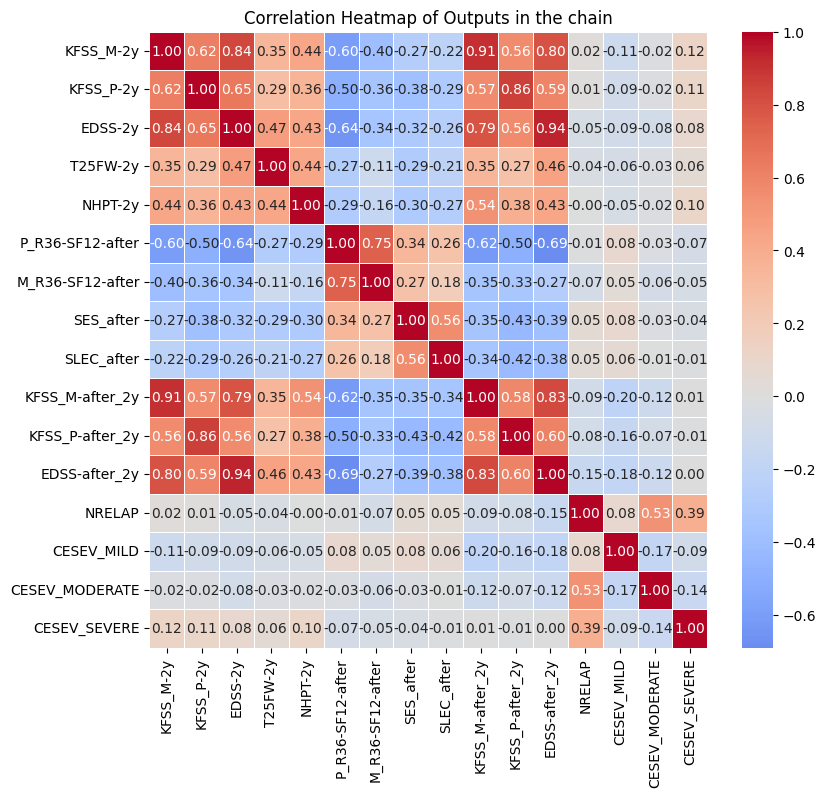

In [47]:
# Correlation heatmap for the outcomes in the chain
outputs_correlation = outputs[['KFSS_M-2y', 'KFSS_P-2y', 'EDSS-2y', 'T25FW-2y', 'NHPT-2y', 'P_R36-SF12-after', 
                               'M_R36-SF12-after', 'SES_after', 'SLEC_after', 'KFSS_M-after_2y', 'KFSS_P-after_2y', 
                               'EDSS-after_2y', 'NRELAP', 'CESEV_MILD', 'CESEV_MODERATE', 'CESEV_SEVERE']]
correlation_matrix_outputs = outputs_correlation.corr()

plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix_outputs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Heatmap of Outputs in the chain')
plt.show()

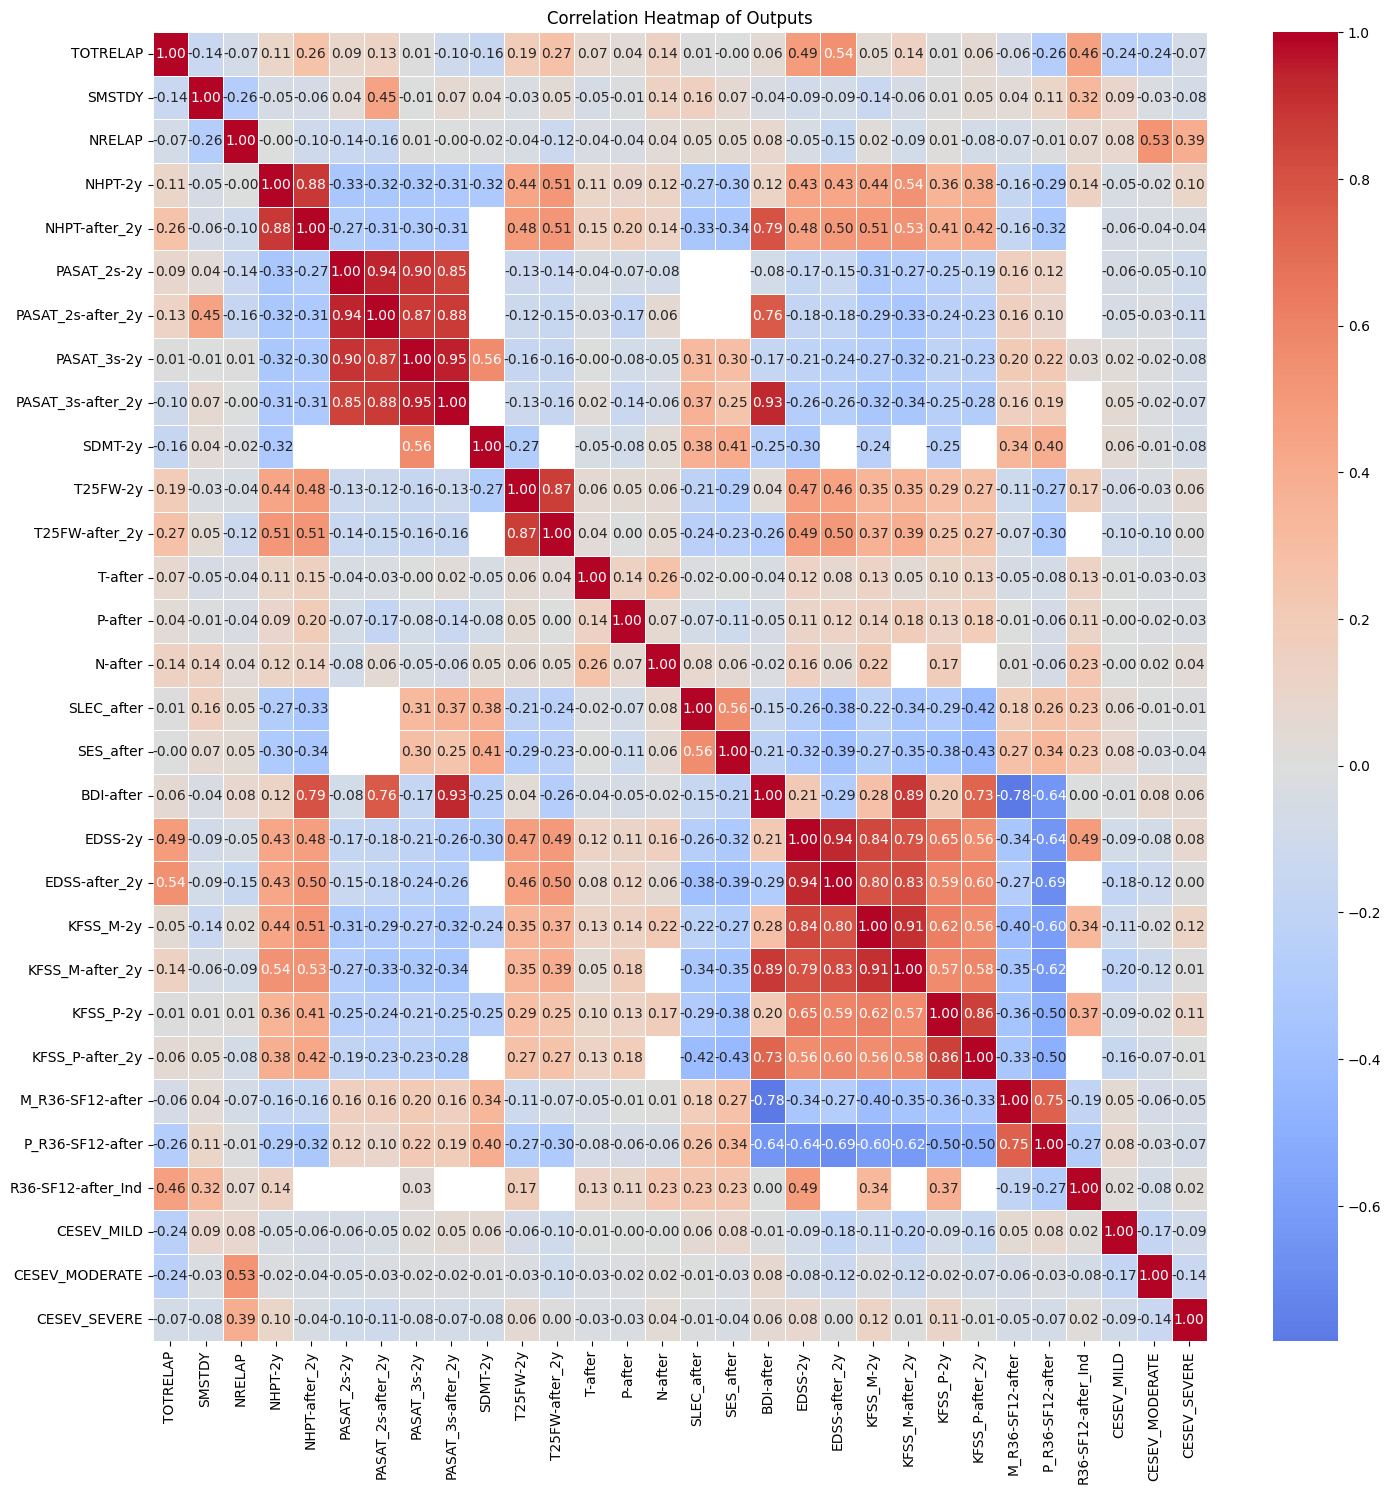

In [48]:
# Correlation heatmap for all possible outcomes
outputs_correlation = outputs
correlation_matrix_outputs = outputs_correlation.corr()

plt.figure(figsize=(17, 17))
sns.heatmap(correlation_matrix_outputs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Heatmap of Outputs')
plt.show()

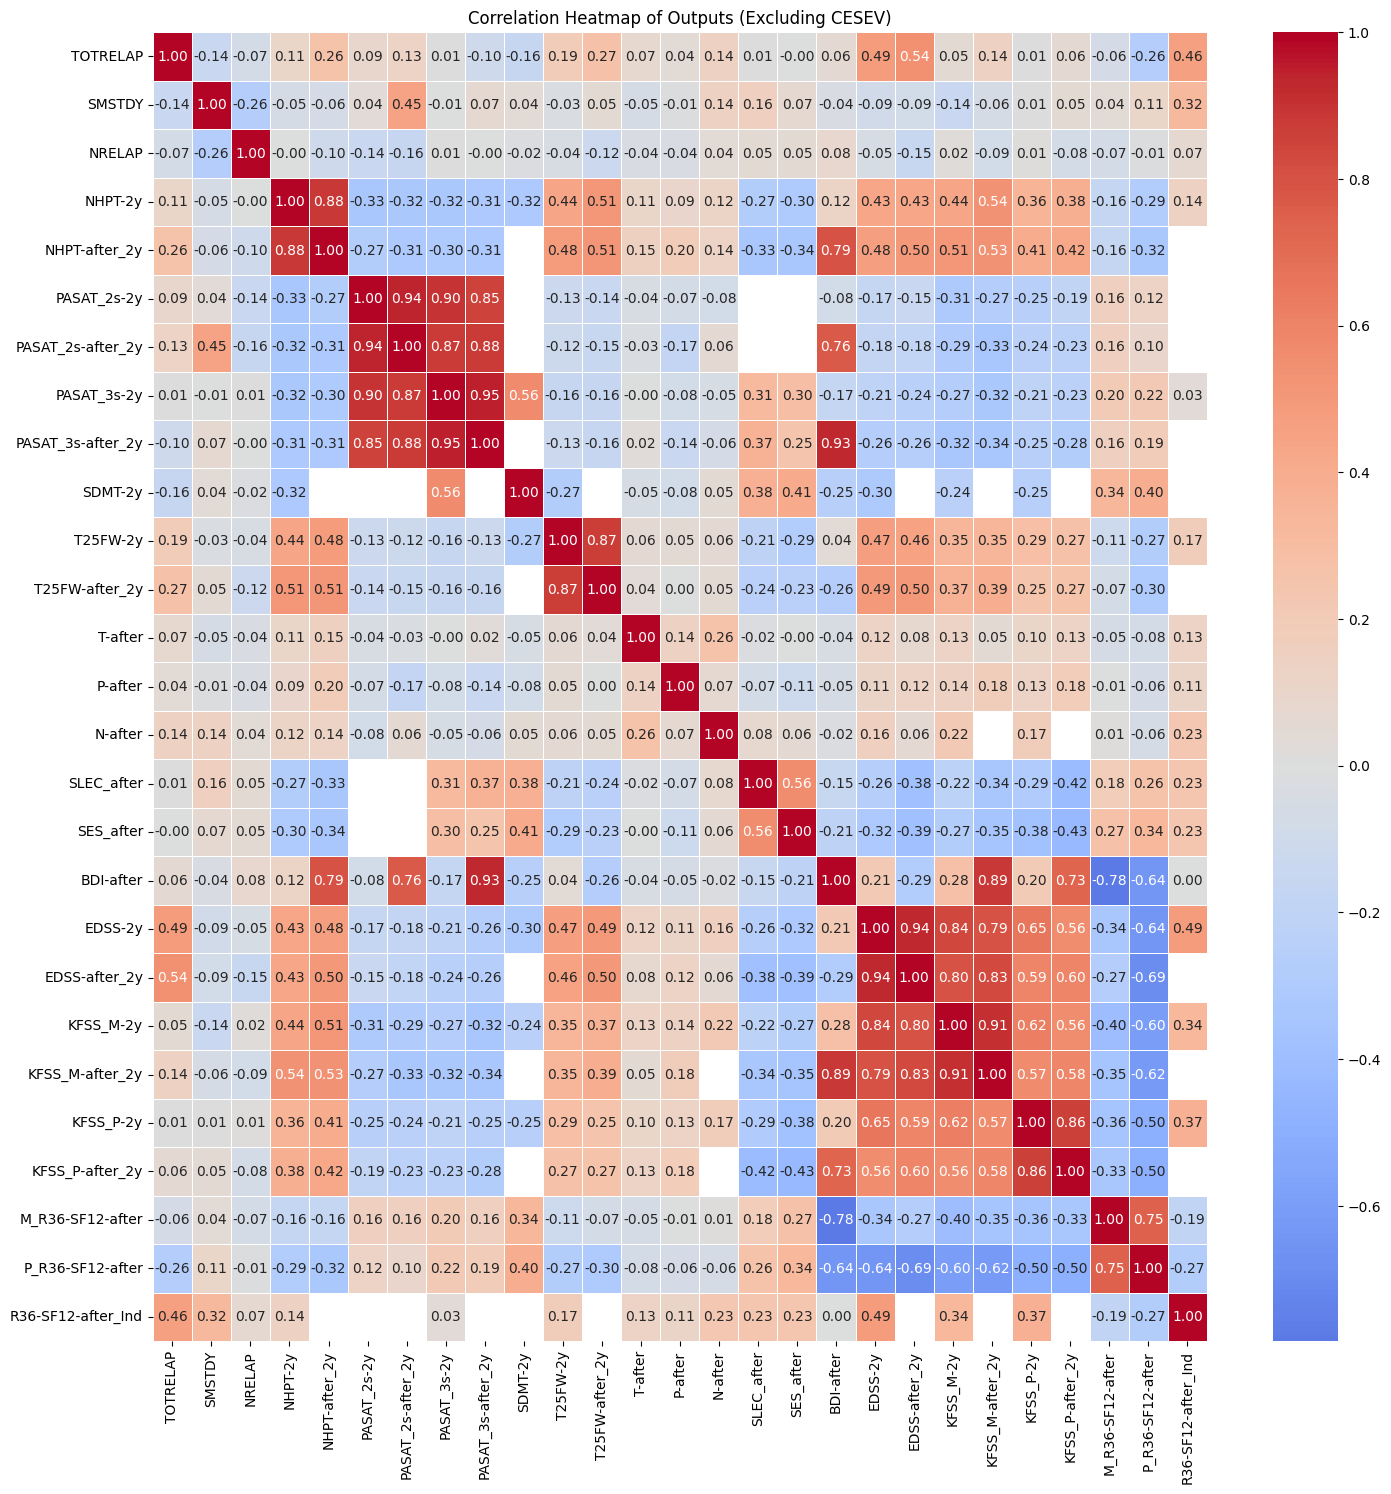

In [49]:
# Correlation heatmap of all possible outcomes except CESEV
cols_to_drop = ['CESEV_MILD', 'CESEV_MODERATE', 'CESEV_SEVERE']
outputs_correlation = outputs.drop(cols_to_drop, axis=1)
correlation_matrix_outputs = outputs_correlation.corr()

plt.figure(figsize=(17, 17))
sns.heatmap(correlation_matrix_outputs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Heatmap of Outputs (Excluding CESEV)')
plt.show()

In [50]:
object_columns = inputs.select_dtypes(include=['object'])
inputs = pd.get_dummies(inputs, columns=object_columns.columns, dtype=int)
#inputs.head()

# For binary ones, only keep one of the two
inputs = inputs.drop(['SEX_M', 'RACE_NON-WHITE', 'CONTINENT_ASIA','MHDIAGN_SPMS','CARDIO_0','URINARY_0','MUSCKELET_0','FATIGUE_0','R36-SF12-before_Ind_0.0','T-before_0.0','N-before_0.0','P-before_0.0'], axis=1)

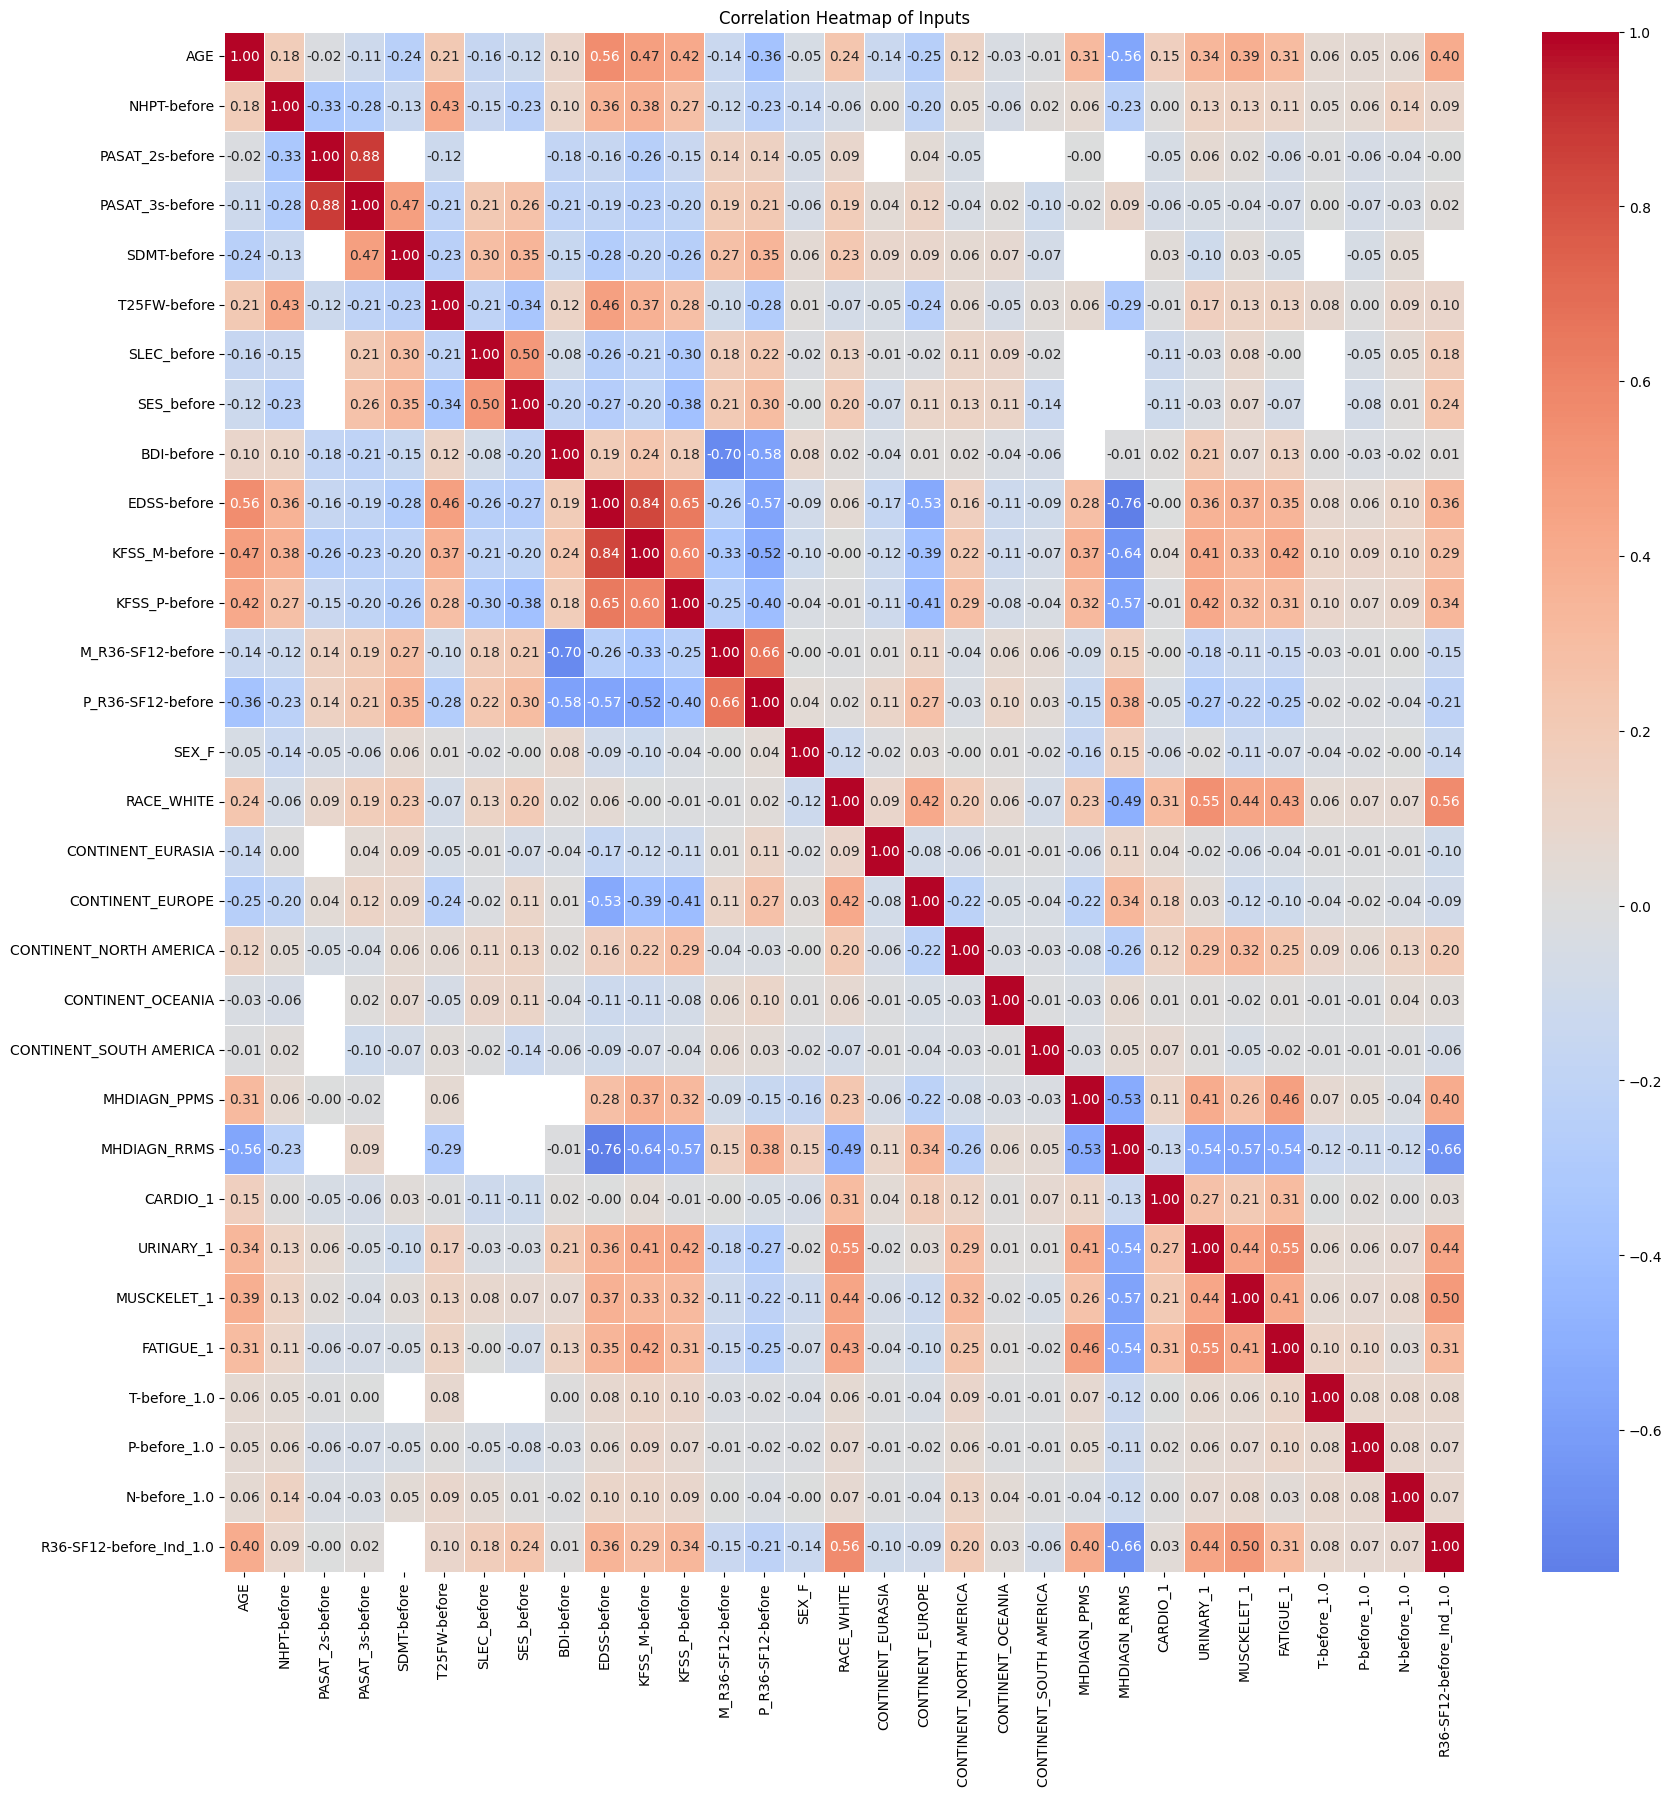

In [51]:
# Correlation heatmap for inputs
correlation_matrix_inputs = inputs.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_inputs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Heatmap of Inputs')

#plt.savefig('C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/Thesis_Sofia_Lennert/assets/corrplot_inputs.png', bbox_inches='tight')
plt.show()
plt.close()

In [52]:
# Concatenate all input and output variables used for the models
outputs_chain = outputs[['KFSS_M-2y', 'KFSS_P-2y', 'EDSS-2y', 'T25FW-2y', 'NHPT-2y', 'P_R36-SF12-after', 'M_R36-SF12-after', 
                               'SES_after', 'SLEC_after', 'EDSS-after_2y', 'KFSS_M-after_2y', 'KFSS_P-after_2y',
                                'NRELAP', 'CESEV_MILD', 'CESEV_MODERATE']]
all = pd.concat([inputs, outputs_chain], axis=1)

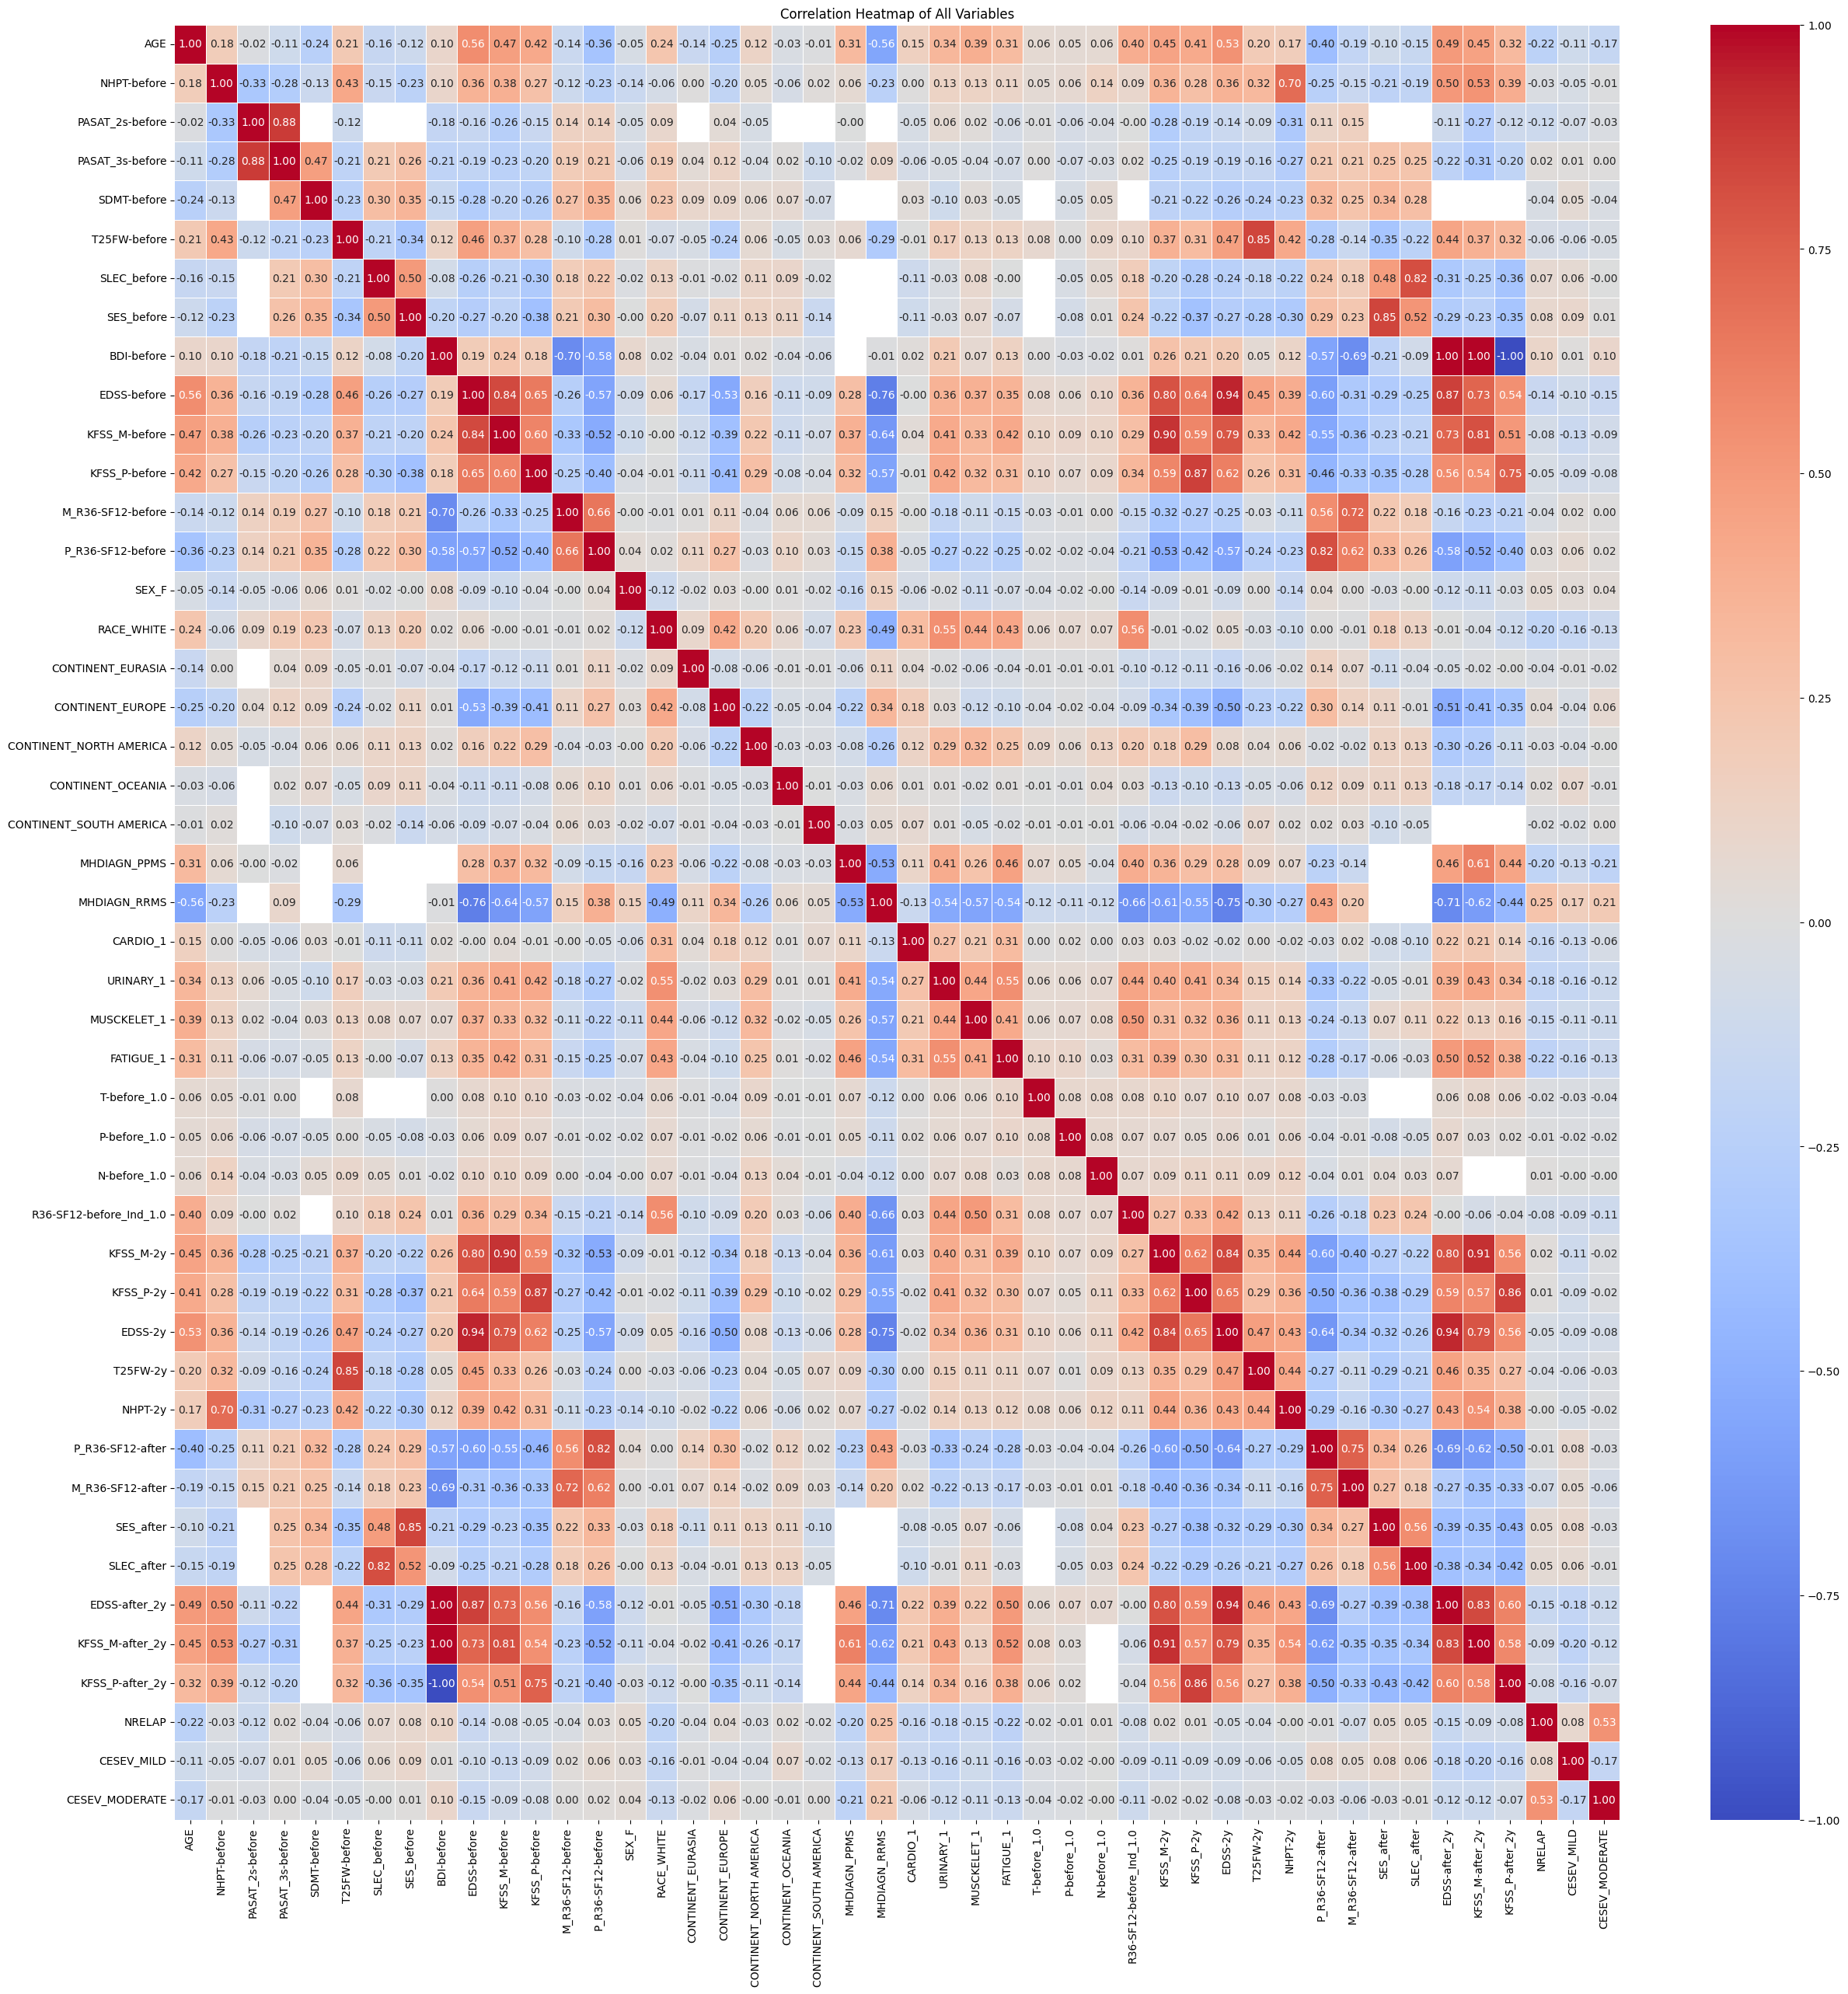

In [53]:
# Correlation heatmap for all variables (income and outcome) used for the models
correlation_matrix_inputs = all.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix_inputs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Heatmap of All Variables')

#plt.savefig('C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/Thesis_Sofia_Lennert/assets/corrplot_inputs.png', bbox_inches='tight')
plt.show()
plt.close()